# CTC Prediction using Machine Learning
In this notebook, I am going through a machine learning project with the goal of predicting the CTC of newly hired employees using given data.

## 1. Problem Statement
Creating a machine learning model to determine the salary of newly hired employees in the company.

## 2. Data
Employee, City and College data is provided in the form of google sheets

## 3. Evaluation Metrics
The evaluation metrics used are r2, mean absolute error and root mean squared log error

## 4. Features
The features present in the notebook are : 
* College Name
* City
* Role : Executive and Manager
* Previous CTC
* Previous Job Change
* Graduation Marks
* Experience in Months

## Preparing the tools

In [3]:
# Importing the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import Lasso

In [132]:
# Loading the data
df = pd.read_csv("C:/Users/dell/Desktop/Power bi/Ctc data.csv", header = 0, encoding='windows-1252')

In [133]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [134]:
df.shape

(1589, 8)

In [135]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 99.4+ KB


## Handling Categorical Data (City and College)
### Loading Data for City

In [138]:
metro_city_df = pd.read_csv("C:/Users/dell/Desktop/Power bi/Cities.csv", header = 0)

In [139]:
metro_city_df.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [140]:
# Converting the column of dataframe into list
li = metro_city_df['Metrio City'].tolist()

In [141]:
print(li)

['Mumbai', 'Delhi', 'Kolkata', 'Chennai', 'Bangalore', 'Hyderabad', 'Ahmedabad', 'Pune', 'Surat']


In [142]:
metro_city = []
for i in df["City"]:
    if i in li:
        metro_city.append("yes")
    else:
        metro_city.append("no")

In [143]:
df["metro_city"] = metro_city

In [144]:
df.metro_city.value_counts()

metro_city
yes    817
no     772
Name: count, dtype: int64

In [145]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,no
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,no
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,no
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,no
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,no


### Loading data for College

In [147]:
college = pd.read_csv("C:/Users/dell/Desktop/Power bi/Colleges.csv", header = 0)

In [148]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [149]:
# Converting columns into list
tier_1 = college['Tier 1'].tolist()
tier_2 = college['Tier 2'].tolist()
tier_3 = college['Tier 3'].tolist()

In [150]:
tier = []
for c_name in df["College"]:
    if c_name in tier_1:
        tier.append(1)
    elif c_name in tier_2:
        tier.append(2)
    else:
        tier.append(3)
print(tier)

[2, 2, 3, 3, 1, 2, 3, 2, 3, 1, 1, 2, 3, 1, 3, 3, 2, 1, 2, 2, 3, 1, 3, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 3, 1, 2, 3, 1, 2, 2, 2, 3, 1, 1, 3, 3, 3, 3, 2, 3, 2, 1, 2, 3, 1, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 2, 2, 3, 2, 2, 3, 3, 1, 3, 2, 1, 3, 1, 2, 1, 3, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2, 1, 3, 1, 1, 1, 2, 2, 1, 2, 3, 2, 2, 3, 3, 2, 1, 3, 1, 1, 1, 2, 1, 1, 1, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 1, 3, 1, 2, 1, 2, 3, 3, 1, 1, 2, 3, 2, 1, 2, 3, 2, 2, 2, 3, 1, 1, 3, 1, 3, 3, 2, 1, 2, 3, 3, 1, 3, 2, 2, 3, 1, 1, 3, 2, 3, 1, 1, 1, 2, 2, 3, 1, 3, 3, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 1, 1, 2, 3, 2, 1, 1, 2, 3, 1, 1, 3, 2, 1, 3, 2, 1, 3, 2, 2, 1, 1, 1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 1, 1, 1, 1, 3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 2, 2, 1, 3, 1, 2, 3, 1, 3, 2, 1, 2, 2, 1, 3, 1, 3, 3, 2, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 2, 2, 1, 2, 3, 1, 2, 2, 2, 1, 3, 2, 1, 2, 1, 

In [151]:
len(tier)

1589

In [152]:
df["tier"] = tier

In [153]:
df.tier.value_counts()

tier
1    578
3    539
2    472
Name: count, dtype: int64

In [154]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,tier
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,no,2
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,no,2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,no,3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,no,3
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,no,1


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   metro_city           1589 non-null   object 
 9   tier                 1589 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 124.3+ KB


### Observations

1. There are no null values
2. Need to delete college, city columns as they are categorical in nature and are not required in regression problem
3. Need to create the dummy variables for metro_city and role columns

In [157]:
# Deleting  redundant columns 
del df["College"]
del df["City"]

In [158]:
df.head()

,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,metro_city,tier
0,Manager,55523,3,66,19,71406.58,no,2
1,Executive,57081,1,84,18,68005.87,no,2
2,Executive,60347,2,52,28,76764.02,no,3
3,Executive,49010,2,81,33,82092.39,no,3
4,Executive,57879,4,74,32,73878.10,no,1


<Axes: xlabel='Role'>

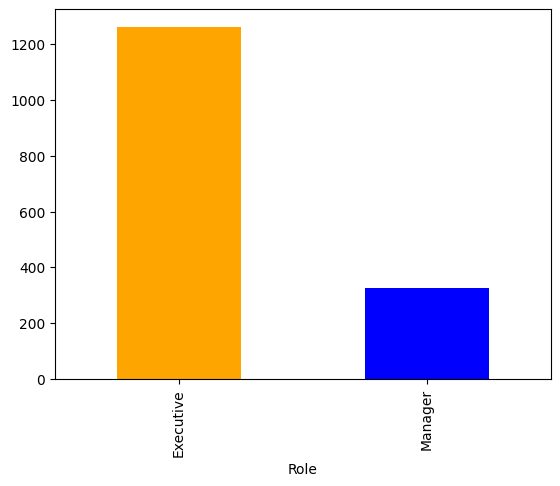

In [202]:
df["Role"].value_counts().plot(kind = "bar", color = ["orange", "blue"])

<Axes: xlabel='metro_city'>

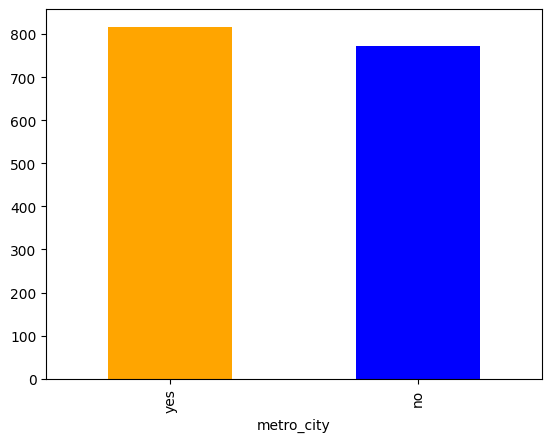

In [204]:
df["metro_city"].value_counts().plot(kind = "bar", color = ["orange", "blue"])

<Axes: xlabel='tier'>

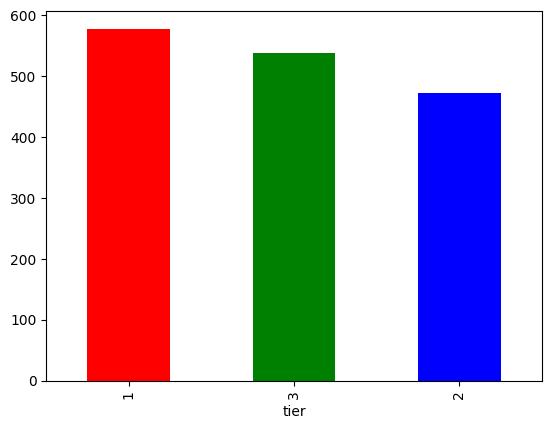

In [206]:
df["tier"].value_counts().plot(kind = "bar", color = ["red", "green", "blue"])

## Dummy Variable Creation and deletion of redundant variables

In [209]:
df = pd.get_dummies(df, dtype = int)

In [211]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier,Role_Executive,Role_Manager,metro_city_no,metro_city_yes
0,55523,3,66,19,71406.58,2,0,1,1,0
1,57081,1,84,18,68005.87,2,1,0,1,0
2,60347,2,52,28,76764.02,3,1,0,1,0
3,49010,2,81,33,82092.39,3,1,0,1,0
4,57879,4,74,32,73878.10,1,1,0,1,0


In [213]:
# Removing redundant variables 
del df["metro_city_no"]

In [215]:
df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,tier,Role_Executive,Role_Manager,metro_city_yes
0,55523,3,66,19,71406.58,2,0,1,0
1,57081,1,84,18,68005.87,2,1,0,0
2,60347,2,52,28,76764.02,3,1,0,0
3,49010,2,81,33,82092.39,3,1,0,0
4,57879,4,74,32,73878.10,1,1,0,0


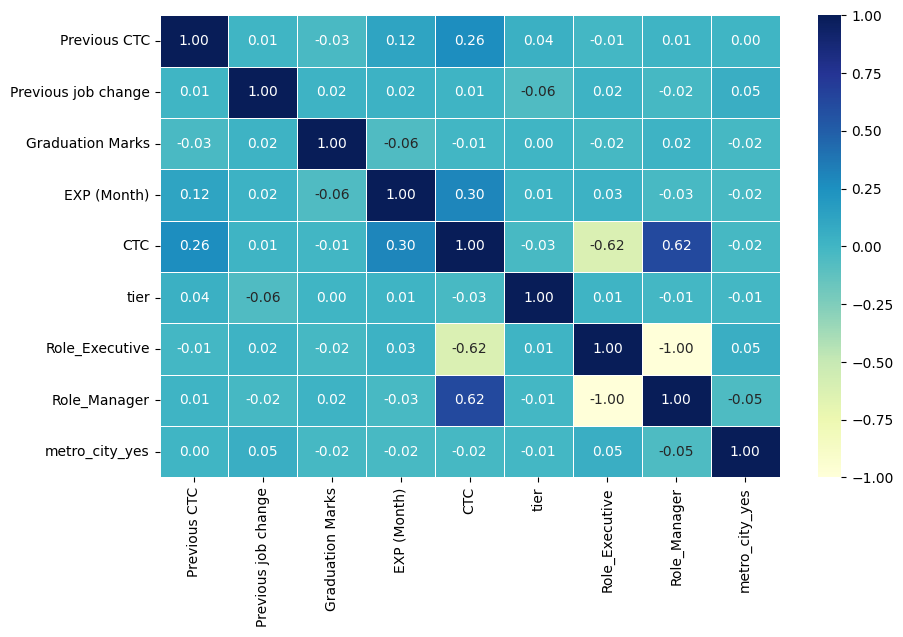

In [217]:
# Making our correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Previous CTC         1589 non-null   int64  
 1   Previous job change  1589 non-null   int64  
 2   Graduation Marks     1589 non-null   int64  
 3   EXP (Month)          1589 non-null   int64  
 4   CTC                  1589 non-null   float64
 5   tier                 1589 non-null   int64  
 6   Role_Executive       1589 non-null   int64  
 7   Role_Manager         1589 non-null   int64  
 8   metro_city_yes       1589 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 111.9 KB


## Observation

1. There is no multi collinearity as no variable is having correlation value greater than 0.8 or less than -0.8.
2. There are no outliers in the data

## Modelling

In [223]:
X = df.drop("CTC", axis = 1)
y = df["CTC"]

In [225]:
X.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),tier,Role_Executive,Role_Manager,metro_city_yes
0,55523,3,66,19,2,0,1,0
1,57081,1,84,18,2,1,0,0
2,60347,2,52,28,3,1,0,0
3,49010,2,81,33,3,1,0,0
4,57879,4,74,32,1,1,0,0


In [227]:
y.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [229]:
# Splitting of data into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [231]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


### Model Comparison

In [342]:
# Putting models in dictionary
models = {"Linear Regression" : LinearRegression(),
          "Random Forest Regressor" : RandomForestRegressor(),
          "AdaBoost" : AdaBoostRegressor(),
         "XGBoost" : xgb.XGBRegressor(),
         "Lasso" : Lasso(alpha = 0.5)}
# Creating a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models.
    models : dict of different Machine learning models
    X_train, y_train : Training dataset
    X_test, y_test : Testing dataset
    """
    # Setting up random seed
    np.random.seed(42)
    # Dictionary to keep model score
    model_scores = {}
    # Loop through model dictionary
    for name, model in models.items():
        if name == "Lasso":
            # Standardisation of data
            scaler = preprocessing.StandardScaler().fit(X_train)
            X_train_scale = scaler.transform(X_train)
            X_test_scale = scaler.transform(X_test)
            # Fitting the model
            model.fit(X_train_scale, y_train)
            model_scores[name] = r2_score(y_test, model.predict(X_test_scale))
        else:
            # Fitting the model
            model.fit(X_train, y_train)
            # Evaluating the model and appending its score to model_scores
            model_scores[name] = r2_score(y_test, model.predict(X_test))
    
    return model_scores

In [236]:
models_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
models_score

{'Linear Regression': 0.5355989894789346,
 'Random Forest Regressor': 0.6579645940898684,
 'AdaBoost': 0.5844058603290109,
 'XGBoost': 0.6143540634245548,
 'Lasso': 0.5356053226103865}

<Axes: >

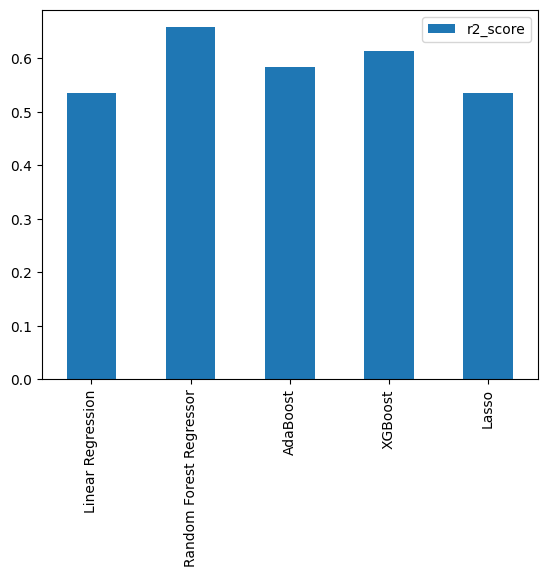

In [238]:
# Graphically comparing the r2 score of different models
model_compare = pd.DataFrame(models_score,
                            index=["r2_score"])
model_compare.T.plot.bar()

In [240]:
# OLS method
X_cons = sm.add_constant(X)
lm = sm.OLS(y, X_cons).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          4.70e-257
Time:                        13:50:51   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1463.780     21.936      0.000    2.92e+04     3.5e+04
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
tier                 -481.5147    258.382     -1.864      0.063    -988.321      25.292
Role_Executive       6311.2273    760.861      8.295      0.000    4818.825    7803.630
Role_Manager          2.58e+04    797.098     32.366      0.000    2.42e+04    2.74e+04
metro_city_yes        380.8308    433.455      0.879      0.380    -469.377    1231.039
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     2.31e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.27e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Observation

Since, RandomForest Regressor is giving the highest r2_score so I am going with the random forest regressor model and for hyperparameter tunning

## HyperParameter Tuning

In [302]:
rf_reg = RandomForestRegressor(n_jobs = -1, random_state = 0)

In [304]:
params_ = {
    'n_estimators': [100, 200, 500, 1000],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 50],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                    # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 10],                  # Minimum samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', 0.5],              # Number of features considered for splitting at each node
    'bootstrap': [True, False]                          # Whether bootstrap samples are used when building trees
}


In [306]:
grid_reg = GridSearchCV(estimator = rf_reg, param_grid = params_, n_jobs = -1, cv = 5, scoring = "r2")

In [308]:
grid_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 50],
                         'max_features': ['sqrt', 'log2', 0.5],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='r2')

In [310]:
grid_reg.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [312]:
grid_est = grid_reg.best_estimator_

In [329]:
y_preds = grid_est.predict(X_test)
y_preds

array([ 69101.8741    ,  71056.33983947,  69654.07976262,  76963.60355   ,
        74160.29425   ,  85685.46317   ,  69864.63737452,  76016.22669786,
        68798.35378   ,  74755.32248624,  68764.81061313,  74917.010586  ,
        89302.13544   ,  75381.01346   ,  74599.9090952 , 102081.19179   ,
        67221.73277889,  67551.40189858,  70021.27547882,  80237.62856   ,
        97041.40219   , 106505.19151   ,  69457.26845233,  69478.97634141,
        69861.19509505,  72043.966725  ,  69183.22482   , 103252.4918    ,
        73897.69393367,  74298.42325167,  65331.50203933,  67369.04695783,
        77370.04442   ,  82894.63801   , 102635.1079    ,  81135.12525   ,
        64667.77948167,  76774.17525   ,  65591.55583   ,  66716.87786104,
        70414.49155418,  76616.93848   ,  72344.55689768,  65979.93076976,
        72278.1970875 ,  70716.97004   ,  75273.24104   ,  69334.09032436,
        66103.85131617,  75587.28089   , 106104.22297   ,  75766.0598    ,
        99180.45705   ,  

In [331]:
# Evaluation metrics
print("r2 : ",  r2_score(y_test, y_preds))
print("MAE : ", mean_absolute_error(y_test, y_preds))
print("RMSLE : ", np.log(np.sqrt(mean_squared_error(y_test,y_preds))))

r2 :  0.660506858133816
MAE :  5442.972479692571
RMSLE :  8.867507653638894


## Feature Importance

In [335]:
gd_reg.feature_importances_

array([0.27260648, 0.03057969, 0.09057822, 0.17385154, 0.0217826 ,
       0.20417176, 0.19369305, 0.01273666])

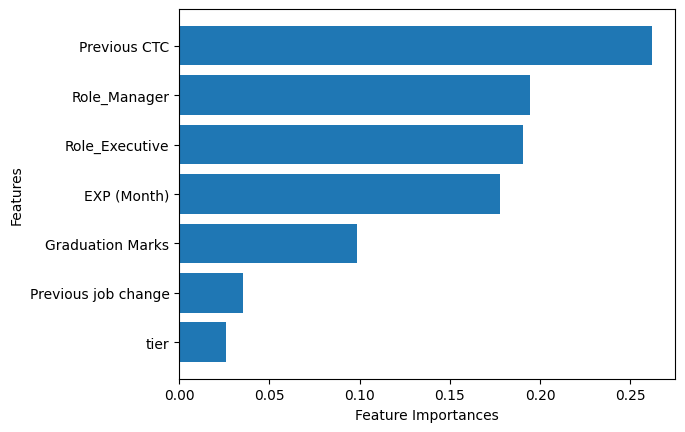

In [333]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=7):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe we have created
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:7])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importances")
    ax.invert_yaxis()
plot_features(X_train.columns, grid_est.feature_importances_)

#### It shows that the most important features are previous Ctc, Role and Experience

# Questions
## 1. Your views about the problem statement?
**Problem Statement** : Create a machine learning model that will help the company in determining the salary of newly hired employees using the given data.

The problem statement is a practical predictive modelling which highlights the common business need i.e ensuring competitive and fair salary for new employees. Some **key features** are:
* Real world applicability
* Data driven decision making
* Relevance with machine learning
* Ensures fairness and competitiveness

## 2. What will be your approach to solving this task?
**Approach** to solve the Ctc prediction problem :
* Problem Statement
* Data and Exploration
* Data Processing
* Model Selection
* Evaluation Metrics

## 3. What ML model options did you have available to perform this task?
Since given problem is a regression problem so ML model options which were available are :
* Linear Regression
* Random Forest Regression
* Ridge Regression
* Lasso Regression
* Ada Boost
* XG Boost
* OLS (Ordinary Least Square)

## 4. Which model’s performance is best and what could be the possible reason for that?
Performance of **Random Forest Regressor model** is the best i.e 0.65.
* Robustness to Non Linear Relationships : It is able to handle the complex and non linear relationship between features and target variables.
* Robustness to Overfitting : Random Forest reduces the overfitting by averaging the results of various decision tree.
* Handles Feature Interactions : It naturally captures the interaction between the features.
* Feature Importance : It provides the insight into feature importance, helping us to identify the variables that influence the target variable the most.
* Stability and Consistency : It decreases the variance as compared to single decision tree.

## 5. What steps can you take to improve this selected model’s performance even further?
* Hyper Parameter Tuning : Optimizing the model's hyper parameters to improve the performance.
* Feature Engineering : Creating new features on the basis of previous knowledge.
* Gathering more data : By gathering more data, training data can have more examples to learn from. 